bbox_to_anchor : 그래프를 범주 밖으로 내보내는 파라미터
twins() : x축을 공유하고 y축이 달라 

# 서브플롯
- Matplotlib를 사용하여 하나의 그래픽 영역을 나누어 두 개 이상의 시각화 결과물을 하나의 화면에서 표현할 수 있다.

### #01. 필요한 패키지 및 샘플 데이터 준비

#### 1) 패키지 참조

In [1]:
import numpy as np
from pandas import read_excel
from matplotlib import pyplot as plt

#### 2) 데이터 가져오기

##### 데이터프레임 생성

In [2]:
df = read_excel("http://data.hossam.kr/D01/traffic_acc_year.xlsx", index_col="년도")
df

,발생건수,사망자수,부상자수
년도,,,
2005,214171,6376,342233
2006,213745,6327,340229
2007,211662,6166,335906
2008,215822,5870,338962
2009,231990,5838,361875
2010,226878,5505,352458
2011,221711,5229,341391
2012,223656,5392,344565
2013,215354,5092,328711


#### 3) 그래프에 대한 전역 환경 설정
- Pyplot 객체의 한글 폰트, 글자크기, 그래픽 사이즈를 설정한다. 이 코드가 다시 실행되기 전까지 모든 그래프 출력에 대해 적용된다.

In [3]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['axes.unicode_minus'] = False

### #02. 서브플롯 영역 나누기

#### 1) 2행 3열을 갖는 서브플롯 영역 생성하기

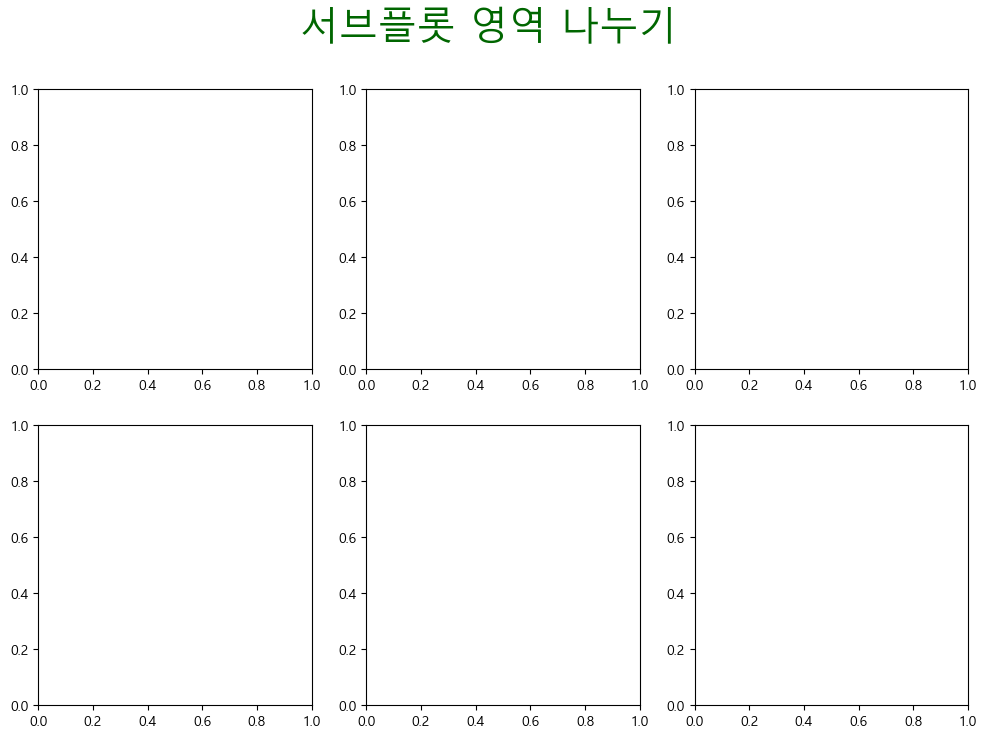

In [4]:
# 서브플롯 생성 -> 2행 3열
# -> fig객체 : 그래픽 처리 기능을 제공
# -> ax객체 : 분할된 각 그래프 영역(리스트)
fig, ax = plt.subplots(2,3)

# 전체항목(제목)
fig.suptitle('서브플롯 영역 나누기', fontsize=28, color="#006600")

# 각 그래프 간의 가로(wspace), 세로(hspace) 간격 지정
fig.subplots_adjust(wspace=0.2, hspace=0.2)

plt.show()
plt.close()

#### #03. 서브플롯에 그래프 그리기

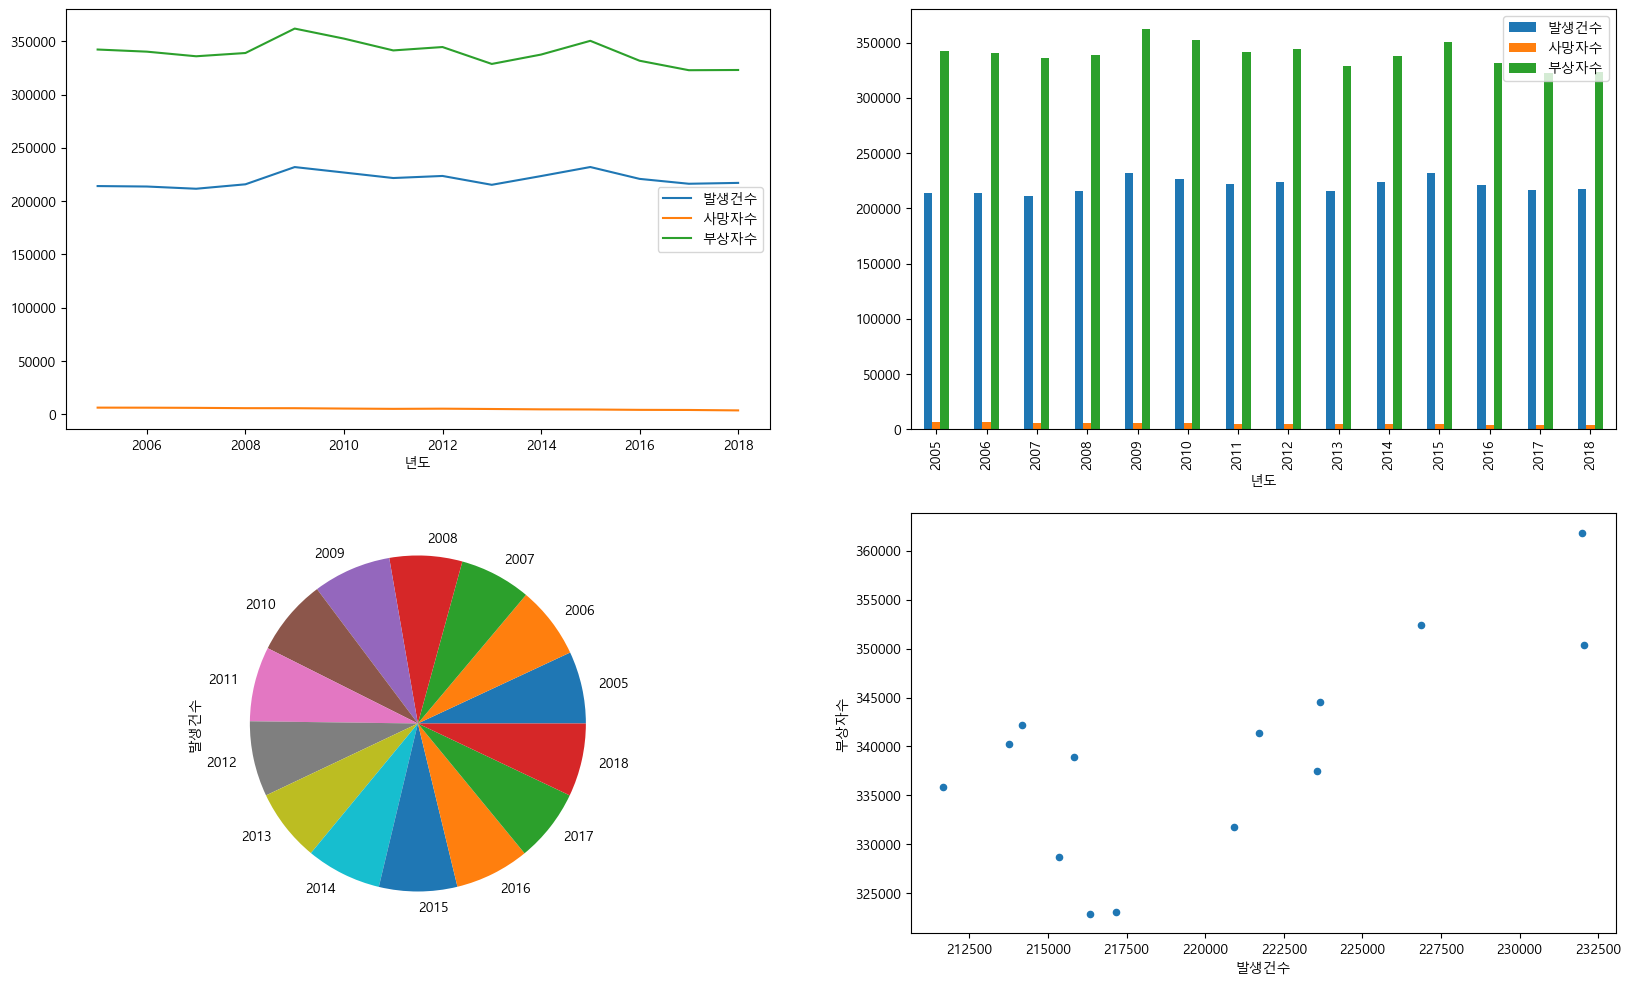

In [6]:
#2행 2열의 영역을 생성한다.
# -> ax에 반환되는 객체는 서브플롯의 행, 열에 대한 n차원 리스트이다.
# -> figsize 파라미터는 그래픽의 크기. plt.rcParams["figure.figsize"]설정보다 우선한다.
fig, ax = plt.subplots(2,2, figsize=(20,12))

# 데이터프레임을 기반으로 각 영역에 그래프를 종류별로 표시
df.plot(ax=ax[0][0])        #선그래프
df.plot.bar(ax=ax[0][1])    #막대그래프

df.plot.scatter(x='발생건수', y='부상자수', ax=ax[1][1]) #산점도그래프

# 그래프 출력하기
plt.show()
plt.close()


#### #04. 서브플롯 영역에 옵션 지정하기

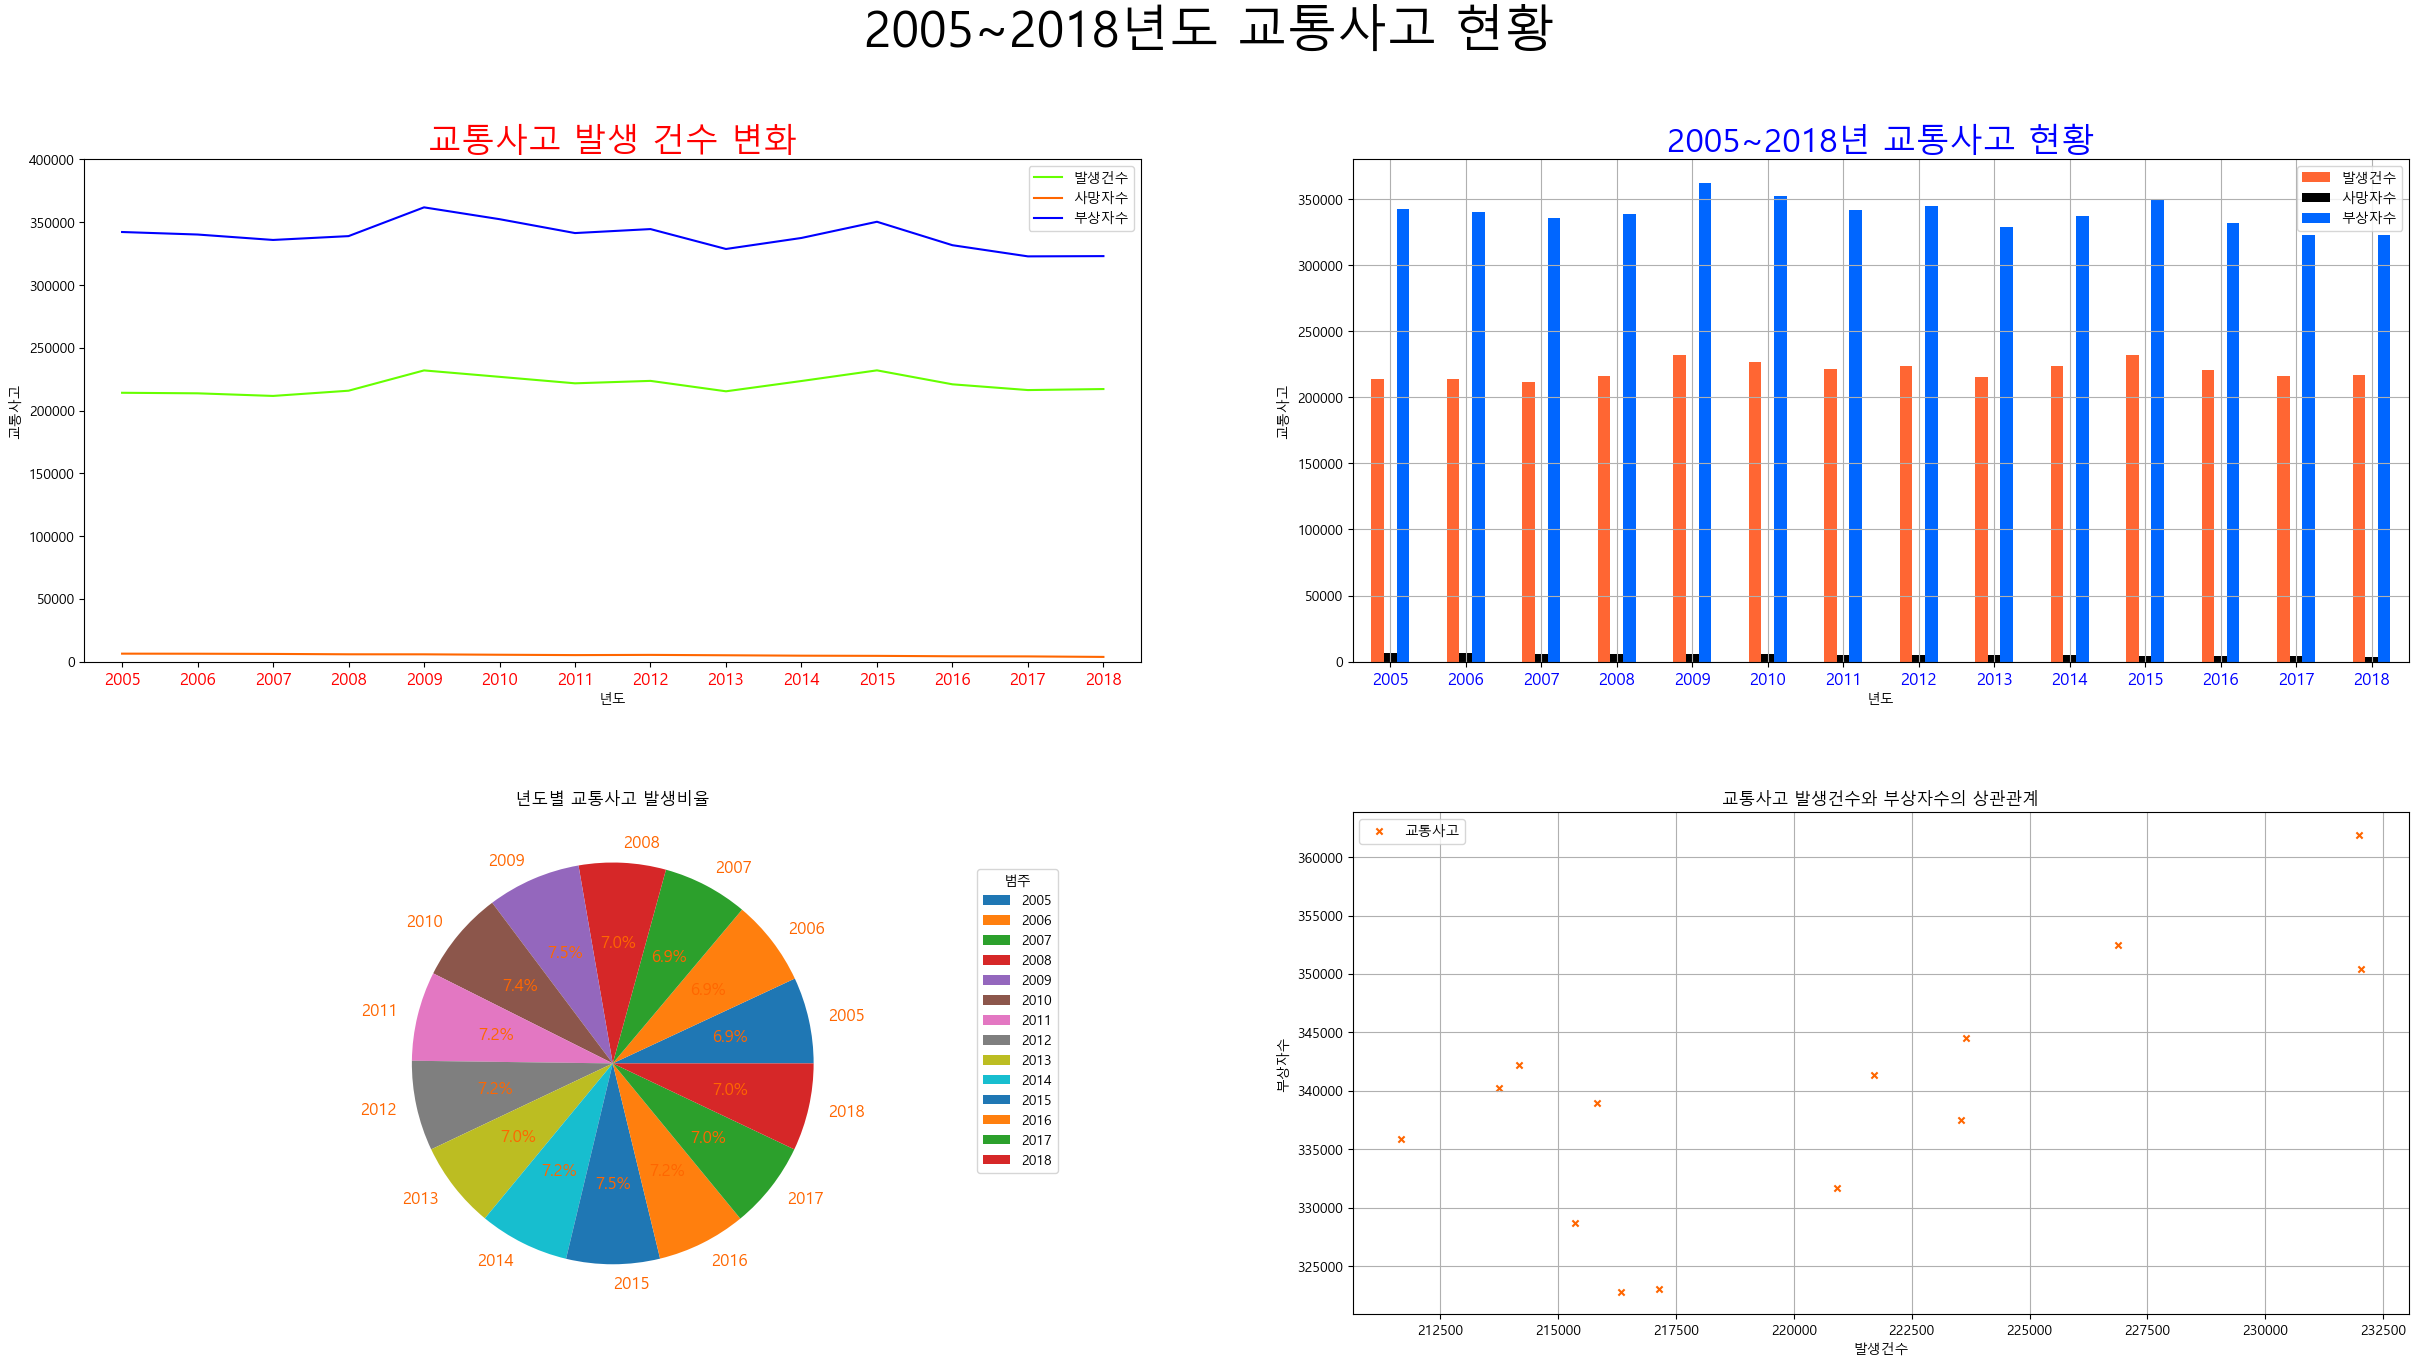

In [16]:
'''2행 2열 생성하기'''
# 2행 2열 생성(plt.subplots(행, 열, fontsize=?))
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(30,15))

# 전체 제목
fig.suptitle('2005~2018년도 교통사고 현황', fontsize=36, color='#000000')

# 각 그래프 간의 가로(wspace), 세로(hspace) 간격 지정
fig.subplots_adjust(wspace=0.2, hspace=0.3)

# ------------------------------------------------------------------------
'''ax1 : 선그래프'''
# 1. 그래프를 그릴 영역 설정 
df.plot(ax=ax1, color=['#66ff00','#ff6600','#0000ff'])

# 2. 그래프 제목의 텍스트, 글자크기, 색상
ax1.title.set_text("교통사고 발생 건수 변화")
ax1.title.set_fontsize(24)
ax1.title.set_color('#ff0000')

# 3. x축과 y축의 라벨을 지정(불필요한 부분은 생략 가능)
ax1.set(xlabel='년도', ylabel='교통사고')

# 4. plt을 직접 사용할 경우 xticks(x축좌표, 표시할 텍스트)형식으로 지정하지만 
# 서브플롯은 x축의 좌표와 표시할 텍스트를 나누어 처리한다.
start = min(df.index)
end = max(df.index)
x = list(range(start, end+1))
# -> 좌표 설정
ax1.set_xticks(x)
# -> 지정된 x축 좌표에 표시될 텍스트 리스트를 지정함
ax1.set_xticklabels(df.index, fontsize=12, color='#ff0000')

# x축, y축의 범위
ax1.set_xlim([start-0.5, end+0.5])
ax1.set_ylim([0,400000])

#---------------------------------------------------------------
'''ax2 = 막대 그래프'''
# 1. 막대그래프 표시
# -> x축의 텍스트가 90도로 표시되므로 rot파라미터를 사용하여 0도로 재지정
# -> 데이터프레임의 각 컬럼에 대한 색상 지정
df.plot.bar(ax=ax2, rot=0, color=['#ff6633','#000000','#0066ff'])

# 2. 배경 격자 표시
ax2.grid()

# 3. 그래프 제목의 텍스트, 글자크기, 색상
ax2.title.set_text('2005~2018년 교통사고 현황')
ax2.title.set_fontsize(24)
ax2.title.set_color('#0000ff')

# 4. x축의 좌표만 지정함(막대그래프의 경우 x축 좌표는 무조건 0부터 시작함)
ax2.set_xticks(list(range(0,len(df.index))))

# 5. 지정된 x축 좌표에 표시될 텍스트 리스트를 지정함
ax2.set_xticklabels(df.index, fontsize=12, color='#0000ff')

# 6. x축과 y축의 라벨을 지정(불필요한 부분은 생략 가능)
ax2.set(xlabel='년도', ylabel='교통사고')

#---------------------------------------------------------------
'''ax3 = 파이그래프'''
# 1. 파이그래프 그리기
df['발생건수'].plot.pie(ax=ax3, labels=df.index, autopct='%0.1f%%', 
                    textprops={'color':'#ff6600', 'fontsize':12})

# 2. 그래프 제목
ax3.title.set_text('년도별 교통사고 발생비율')

# 3. 격자표시 -> 파이그래프인 경우에 표시 안됨
ax3.grid()

# 4. y축 라벨이 불필요하므로 제거
ax3.set(ylabel=None)

# 5. 범주 표시
ax3.legend(labels=df.index, title='범주', bbox_to_anchor=(1.4 , 0.9))

#-------------------------------------------------------------
'''ax4 = 선점도 그래프'''
# 1. 선점도 그래프 그리기
df.plot.scatter(ax=ax4, x='발생건수', y='부상자수', color='#ff6600',marker='x',label='교통사고')

# 2. 그래프제목 지정
ax4.title.set_text("교통사고 발생건수와 부상자수의 상관관계")

# 3. 배경격자
ax4.grid()

# 4. x축, y축 라벨
ax4.set(xlabel='발생건수', ylabel='부상자수')

#----------------------------------------------------------
# 그래프 출력
plt.show()
plt.close()


### #05. 두 개의 y축을 갖는 그래프

#### 1) 샘플 데이터 만들기

##### x축 데이터(공용)

In [17]:
x = list(range(0,10))
x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

##### 첫번째 y축 데이터

In [18]:
y1 = list(range(0,10,1))
y1

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

##### 두 번째 y축 데이터

In [20]:
y2 = list(np.arange(0,5,0.5))
y2

[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5]

#### 2) 기본 그래프 구현

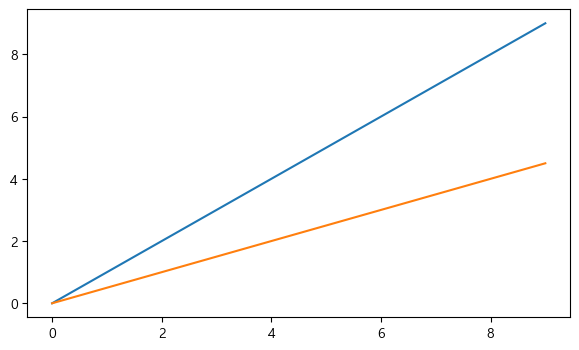

In [21]:
plt.rcParams['figure.figsize'] = (7,4)

plt.figure()
plt.plot(x, y1)
plt.plot(x, y2)
plt.show()
plt.close()

#### 3) 서브플롯으로 2개의 y축을 갖는 그래프 구현

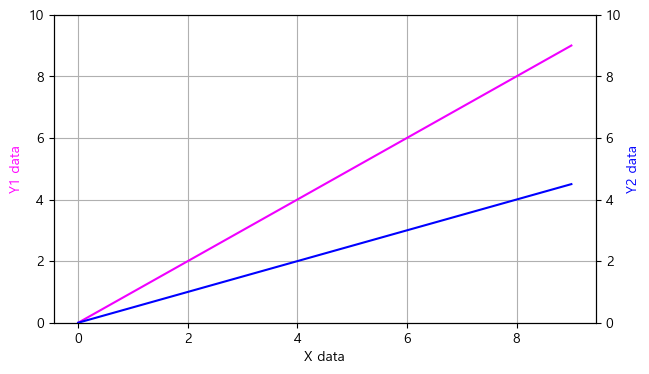

In [24]:
# 그래프 시작
fig, ax1 = plt.subplots(1,1, figsize=(7,4))

# ax1에 겹쳐지는 쌍둥이 서브플롯을 생성
ax2 = ax1.twinx()

# ax1에 그래프 그리기
ax1.plot(x, y1, color='#f000ff')
ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='#ff00ff')
ax1.grid()
ax1.set_ylim([0,10])

# ax2에 그래프 그리기
ax2.plot(x, y2, color='#0000ff')
ax2.set_ylabel('Y2 data', color='#0000ff')
ax2.set_ylim([0,10])

plt.show()
plt.close()

### 06. 예제 : 교통사고 발생건수와 사망자수 변화 시각화하기
- 우리나라는 2008년도에 자동차안전기준에 관한 규칙 일부개정령(안)을 개정한 이후 꾸준히 교통사고 안전기준을 강화해왔다. 이러한 노력이 교통사고 부상자수를 줄이는데 효과가 있엇는지 알아보자

#### 그래프 그리기

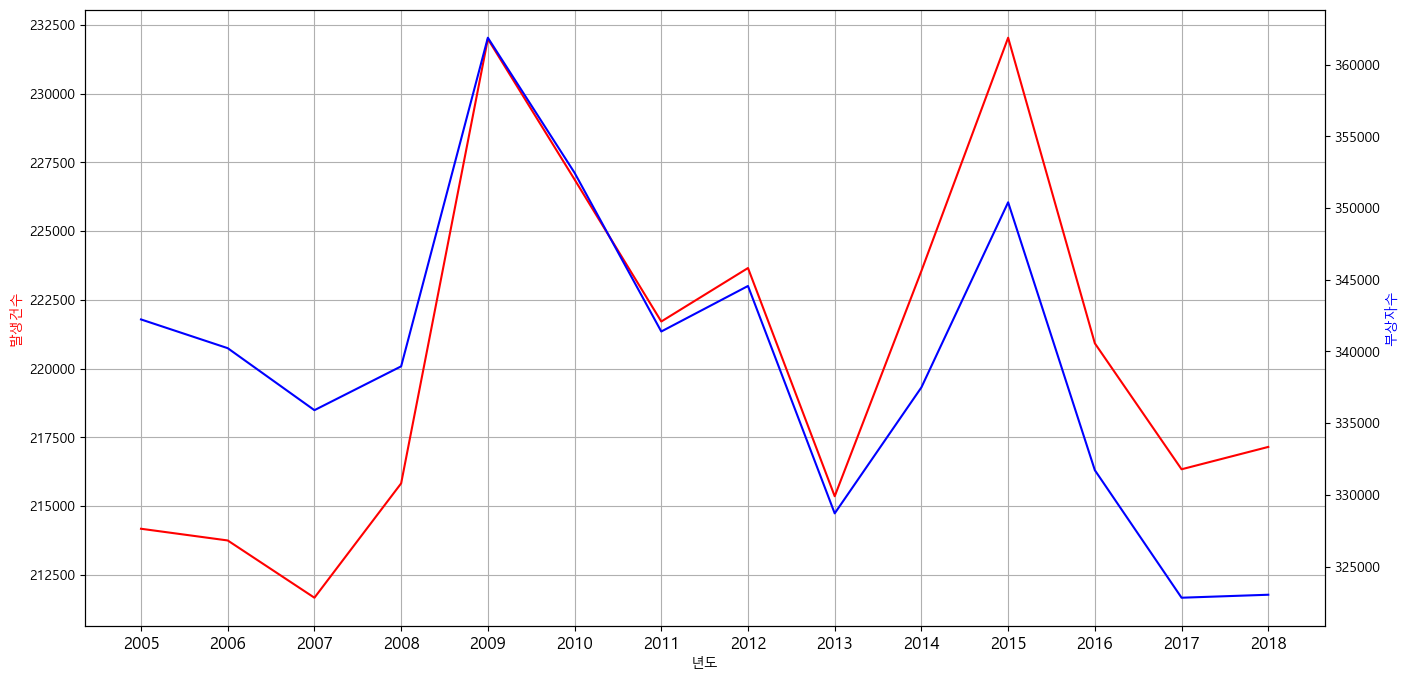

In [25]:
fig, ax1 = plt.subplots(1,1,figsize=(16,8))
ax2 = ax1.twinx()

# ax1에 그래프 그리기
df['발생건수'].plot(ax=ax1, color='#ff0000')
ax1.set_xlabel('년도')
ax1.set_ylabel('발생건수', color='#ff0000')
ax1.grid()

# x축 좌표위의 텍스트 처리
start = min(df.index)
end = max(df.index)
ax1.set_xticks(list(range(start, end+1)))
ax1.set_xticklabels(df.index, fontsize=12, color='#000000')

# ax2에 그래프 그리기
df['부상자수'].plot(ax=ax2, color='#0000ff')
ax2.set_ylabel('부상자수', color='#0000ff')

plt.show()
plt.close()